# Python Text Final Assigment

## Introduction

In this report I make a dataset containing CNN and FOX News news. Then I analyse the dataset with various method learned in class.

In [62]:
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

import glob
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

## CNN Dataset

The CNN data set is from https://huggingface.co/datasets/cnn_dailymail it contains cnn and daily mail news data. There are three columns: article with the full article, highlights the summary of the article, and id which seems to be a random hash.
There is daily mail data in there too so I took out the first thing between parentheses and if it was CNN I classified it as a CNN article, then I tagged them with CNN

In [63]:
##dataset = load_dataset("cnn_dailymail", '3.0.0')

Reusing dataset cnn_dailymail (C:\Users\kanyi\.cache\huggingface\datasets\cnn_dailymail\3.0.0\3.0.0\3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)


  0%|          | 0/3 [00:00<?, ?it/s]

In [64]:
##dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [65]:
##df1 = pd.DataFrame(dataset['train'])
##df2 = pd.DataFrame(dataset['test'])
##df3 = pd.DataFrame(dataset['validation'])

In [66]:
##df = pd.concat([df1,df2,df3], ignore_index=True)

In [67]:
##df['news_site'] = df['article'].str.extract('.*\((.*)\).*')

In [68]:
##df['news_site'].value_counts()

CNN                                 47099
right                               18908
pictured                            14322
left                                11280
centre                               2519
                                    ...  
16 percent vs. 9 percent                1
a vampire                               1
OK, put those ears down, Robsten        1
National Security Adviser Thomas        1
$97million                              1
Name: news_site, Length: 64418, dtype: int64

In [69]:
## The directions are from the articles where they describe an image in a text

In [70]:
##df_cnn = df[df.news_site== 'CNN']
##df_cnn

,article,highlights,id,news_site
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,0002095e55fcbd3a2f366d9bf92a95433dc305ef,CNN
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,00027e965c8264c35cc1bc55556db388da82b07f,CNN
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,0003ad6ef0c37534f80b55b4235108024b407f0b,CNN
5,(CNN) -- Thousands on Saturday fled the area i...,"Humanitarian groups expect 4,000 refugees in o...",0004306354494f090ee2d7bc5ddbf80b63e80de6,CNN
6,(CNN) -- Four groups that advocate for immigra...,NEW: 4 groups announce legal challenge in Phoe...,0005d61497d21ff37a17751829bd7e3b6e4a7c5c,CNN
...,...,...,...,...
299811,(CNN)To beat the world's best golfers you ofte...,Inbee Park wins LPGA Tour event in Singapore o...,fca5d9e974fa55d949df2bd2986bf8bf153b0f1b,CNN
299812,"(CNN)Don't listen to the haters, Dakota Johnso...","Actress Dakota Johnson hosted ""Saturday Night ...",fd8b7d228e2fcdd3d4e9fdcfa5cff527d09dc32c,CNN
299816,(CNN)Police officer and former U.S. Army Range...,Bullet is successfully removed from officer's ...,fe7a09b76ec43a9b99b96082b4cd093fed3f0a02,CNN
299817,"Mogadishu, Somalia (CNN)Gunmen detonated bombs...",Somali diplomat to the United Nations in Genev...,fe97ee4dba07a4eef8910afe3720247fe79f2656,CNN


In [71]:
##df_cnn = df_cnn.drop(['id', 'highlights'], axis=1)

## FOX News dataset

https://sites.google.com/site/qianmingjie/home/datasets/cnn-and-fox-news

In [73]:
##topic_list = ['sports','science','health','travel']

In [97]:
"""
df_fox = pd.DataFrame()
df_new = pd.DataFrame()
for i in topic_list:
    for file in glob.glob("foxnews_" + i + "/*.txt"):
        with open(file, encoding='utf-8') as f:
            contents = f.readlines()
        include_str_flag = False
        result_str = ""
        for line in contents:
            lineStripped = line.strip()
            if lineStripped == "</TEXT>":
                include_str_flag = False
            if include_str_flag:
                result_str += lineStripped
            if lineStripped == "<TEXT>":
                include_str_flag = True
        df_new['news_site'] = ["fox"]
        df_new['article'] = result_str
        df_new['topic'] = [i]
        if(df_fox.empty):
            df_fox = df_new
        else:
            df_fox = df_fox.append(df_new)
"""

'\ndf_fox = pd.DataFrame()\ndf_new = pd.DataFrame()\nfor i in topic_list:\n    for file in glob.glob("foxnews_" + i + "/*.txt"):\n        with open(file, encoding=\'utf-8\') as f:\n            contents = f.readlines()\n        include_str_flag = False\n        result_str = ""\n        for line in contents:\n            lineStripped = line.strip()\n            if lineStripped == "</TEXT>":\n                include_str_flag = False\n            if include_str_flag:\n                result_str += lineStripped\n            if lineStripped == "<TEXT>":\n                include_str_flag = True\n        df_new[\'news_site\'] = ["fox"]\n        df_new[\'article\'] = result_str\n        df_new[\'topic\'] = [i]\n        if(df_fox.empty):\n            df_fox = df_new\n        else:\n            df_fox = df_fox.append(df_new)\n'

In [75]:
#df_fox = df_fox.reset_index(drop=True)
#df_fox

,news_site,article,topic
0,fox,Tampa Bay Buccaneers new head coach Lovie Smit...,sports
1,fox,Tampa Bay Buccaneers new head coach Lovie Smit...,sports
2,fox,San Francisco 49ers wide receiver Michael Crab...,sports
3,fox,Indianapolis Colts' Robert Mathis (98) celebra...,sports
4,fox,Cincinnati Bengals head coach Marvin Lewis loo...,sports
...,...,...,...
1518,fox,Falcon's Fury is a new thrill ride that climbs...,travel
1519,fox,"So if you have the guts, how do you do it?APBu...",travel
1520,fox,Royal Caribbean's Quantum of the Seas is chang...,travel
1521,fox,Monet’s garden.France Tourism Development Agen...,travel


In [76]:
#df_all = pd.concat([df_fox,df_cnn], ignore_index=True)

In [77]:
#df_all['news_site'].value_counts()

CNN    47099
fox     1523
Name: news_site, dtype: int64

In [78]:
#df_cnn_subsample = df_cnn.loc[np.random.choice(df_cnn.index, 1525, replace=False)]

In [95]:
#df_all = pd.concat([df_fox,df_cnn_subsample], ignore_index=True)
#df_all.to_csv("df_all.csv")

## EDA

Read in from git and remove extra column

In [100]:
df_all = pd.read_csv("https://raw.githubusercontent.com/kanyipi/images/main/df_all.csv")
df_all = df_all.drop(['Unnamed: 0'], axis = 1)

Check NAs

In [101]:
df_all.isna().sum

news_site       0
article         0
topic        1525
dtype: int64

In [120]:
wc1 = WordCloud(width = 1800 , height = 1000).generate(" ".join(df_all[df_all.news_site == "CNN"].article))

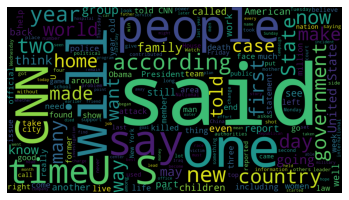

In [121]:
plt.imshow(wc1)
plt.axis("off")
plt.show()

In [124]:
wc2 = WordCloud(width = 1800 , height = 1000).generate(" ".join(df_all[df_all.news_site == "fox"].article))

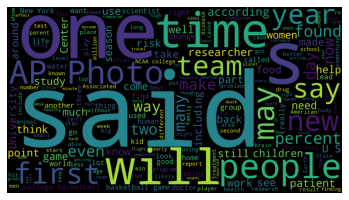

In [125]:
plt.imshow(wc2)
plt.axis("off")
plt.show()

In [126]:
df_all['length'] = df_all['article'].apply(lambda x: len(x.split(" ")))

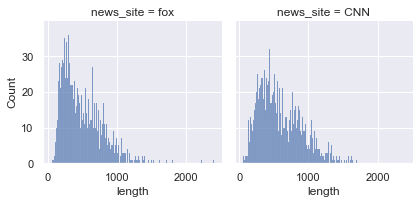

In [127]:
sns.set_theme(style="darkgrid")
sns.displot(
    df_all, x="length", col="news_site",
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
)

In [128]:
lemmatizer = WordNetLemmatizer()

In [129]:
def text_preprocesser(text):
    text= re.sub(r'\W',' ', text) # remove non-alphanumeric
    tokens = word_tokenize(text.lower()) # lowercase every letter
    tokens = [token for token in tokens if token not in stopwords.words('english')] # remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # apply lemmatization
    tokens = [word for word in tokens if len(word)>=3] # only keep words with over 3 letters
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 


df_all['article_clean'] = df_all['article'].apply(text_preprocesser)

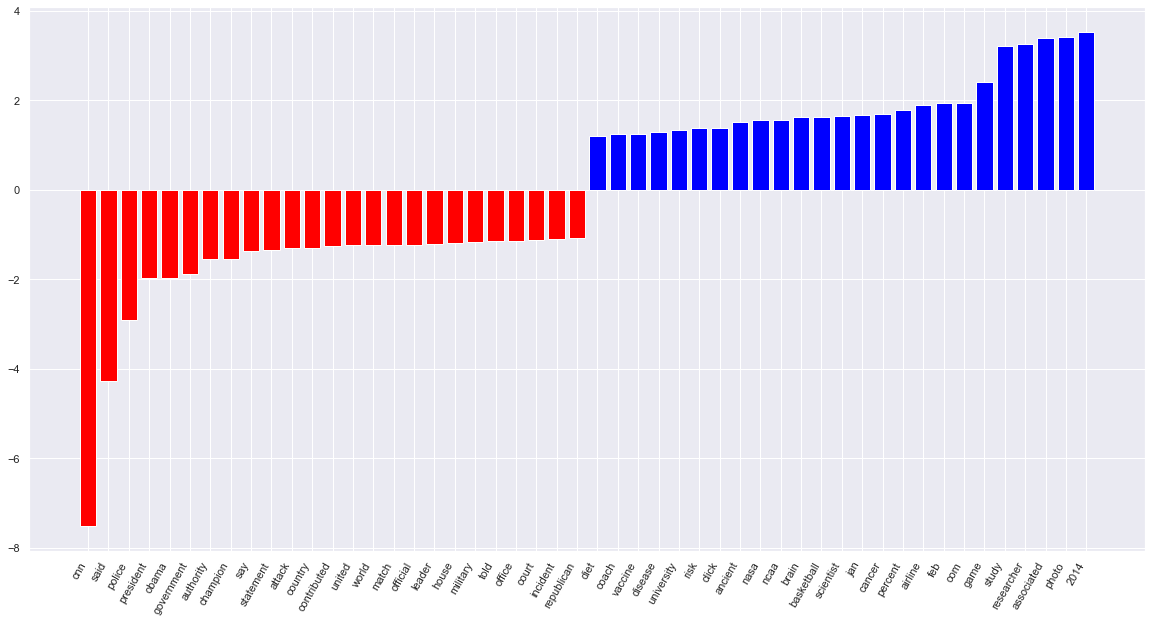

In [130]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(20, 10))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 50), feature_names[interesting_coefficients], rotation=60, ha="right")


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_all['article_clean'])
clf = LogisticRegression()
clf.fit(X, df_all['news_site'])

visualize_coefficients(clf, vectorizer.get_feature_names())  

In [131]:
def text_preprocesser_upd(text):
    text= re.sub(r'\W',' ', text) # remove non-alphanumeric
    tokens = word_tokenize(text.lower()) # lowercase every letter
    tokens = [token for token in tokens if token not in (stopwords.words('english') + ["cnn","2014"])] # remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # apply lemmatization
    tokens = [word for word in tokens if len(word)>=3] # only keep words with over 3 letters
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 
df_all['article_clean'] = df_all['article'].apply(text_preprocesser_upd)

In [132]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(df_all['article_clean'], df_all['news_site'], test_size=0.2, random_state=1, stratify=df_all['news_site'])

In [133]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  #Naive Bayes classifier
])

In [134]:
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

In [135]:
print (classification_report(label_test,  predictions))

              precision    recall  f1-score   support

         CNN       0.92      0.94      0.93       305
         fox       0.94      0.92      0.93       305

    accuracy                           0.93       610
   macro avg       0.93      0.93      0.93       610
weighted avg       0.93      0.93      0.93       610

